In [2]:
import numpy as np
import pandas as pd

In [46]:
OUT_SIZE = 20
num_classes = 1
path = "../spotgarbage-GINI/spotgarbage/garbage-queried-images/"
background_path = "../spotgarbage-GINI/spotgarbage/background/"

In [4]:
import cv2
import matplotlib.pyplot as plt

In [5]:
import json5

In [6]:
with open("export_19.json","r") as f:
    data = json5.load(f)

In [40]:
import os

In [41]:
fnames = os.listdir(path)

In [65]:
lbls = {}
not_found = {}
for dt in data:
    mask = np.zeros((dt['height'],dt['width'],1), dtype=np.uint8)
    vector = np.asarray(dt['vector'])
    mask = cv2.fillPoly(mask, [vector], 1)
    rm = cv2.resize(mask, (OUT_SIZE,OUT_SIZE))
    if dt['imagename'] not in fnames:
        not_found[dt['imagename']] = 0
    if dt['imagename'] in lbls.keys():
        lbls[dt['imagename']] = np.clip(lbls[dt['imagename']] + rm, 0, 1)
    else:
        lbls[dt['imagename']] = rm

In [66]:
not_found

{'9e7858f8-6799-11e5-ba3c-40f2e96c8ad8.jpg': 0,
 '000021.jpg': 0,
 'cb8a2db2-6799-11e5-ba3c-40f2e96c8ad8.jpg': 0}

In [78]:
backgrounds = os.listdir(background_path)

In [68]:
rand_backgrounds = np.random.choice(backgrounds,350)

In [69]:
rm = np.zeros((OUT_SIZE,OUT_SIZE), dtype=np.uint8)
for rb in rand_backgrounds:
    if rb in lbls.keys():
        print(rb)
    else:
        lbls[rb] = rm

c5dd501a-9435-11e5-917c-40f2e96c8ad8.jpg
642b7e92-943e-11e5-a062-40f2e96c8ad8.JPG
dae5cbfa-9448-11e5-a299-40f2e96c8ad8.jpg
b5d872d4-9440-11e5-8d88-40f2e96c8ad8.jpg
77bddbaa-9441-11e5-a88c-40f2e96c8ad8.jpg
f0b03d7e-9436-11e5-b500-40f2e96c8ad8.jpg
98c013c6-9438-11e5-aef0-40f2e96c8ad8.jpg
0dd843c6-943a-11e5-ba6d-40f2e96c8ad8.jpg
a769d4b2-9446-11e5-b59a-40f2e96c8ad8.jpg
a8e18ed0-9436-11e5-b500-40f2e96c8ad8.jpg
aab48f96-9440-11e5-8d88-40f2e96c8ad8.png
e16fd6f0-9443-11e5-bdaa-40f2e96c8ad8.image_full
8d3f6d52-9439-11e5-bc72-40f2e96c8ad8.jpg
76209cc2-9439-11e5-bc72-40f2e96c8ad8.jpg
0b3c11a0-e607-11e5-a917-40f2e96c8ad8.jpg
9f926634-679e-11e5-b0d3-40f2e96c8ad8.jpg
248c433c-943b-11e5-9fb2-40f2e96c8ad8.jpg
1c4d2eec-9446-11e5-8185-40f2e96c8ad8.jpg
215a06a2-9438-11e5-aef0-40f2e96c8ad8.jpg
e538b01e-943d-11e5-a062-40f2e96c8ad8.jpg
0075230e-9442-11e5-b514-40f2e96c8ad8.jpg
5c5a34d2-943a-11e5-ba6d-40f2e96c8ad8.JPG
0ed07710-9446-11e5-8185-40f2e96c8ad8.jpg
39f8ee9e-943d-11e5-9331-40f2e96c8ad8.jpg
0dd843c6-

In [59]:
len(lbls)

581

In [12]:
img = cv2.imread(data[0]['imagename'])
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

In [13]:
mask = np.zeros((data[0]['height'],data[0]['width'],1), dtype=np.uint8)

In [14]:
img.shape,mask.shape

((360, 480, 3), (360, 480, 1))

In [15]:
vector = np.asarray(data[0]['vector'])

In [16]:
mask = cv2.fillPoly(mask, [vector], 1)

In [17]:
rm = cv2.resize(mask, (20,20))

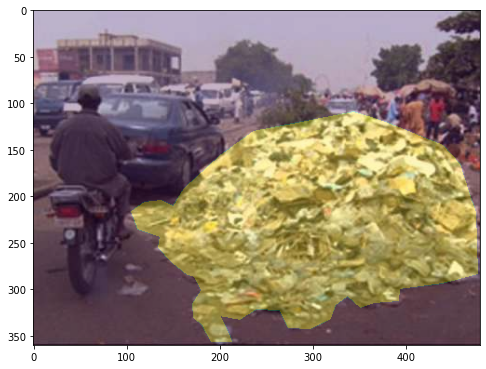

In [20]:
plt.figure(figsize=(8, 8), frameon=False)
plt.imshow(img)
plt.imshow(mask.squeeze(), alpha=0.3)
plt.show()